In [ ]:
import pandas as pd
df = pd.read_csv("/content/titanic.csv")

In [ ]:
df.shape

(1309, 28)

In [ ]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Passengerid,0
Age,0
Fare,0
Sex,0
sibsp,0
zero,0
zero.1,0
zero.2,0
zero.3,0
zero.4,0


In [ ]:
from sklearn import preprocessing
# Data Pre-processing
# 1. Handle Missing Values
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Impute missing Age values with mean
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Impute missing Embarked values with mode

# 2. Feature Engineering
df['Is_Minor'] = (df['Age'] < 18).astype(int)

# 3. One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'])

# Select features - Updated to reflect the new column names after one-hot encoding
features = ['Age', 'sibsp', 'Parch', 'Fare']
features.extend([col for col in df.columns if col.startswith('Embarked_')])
features.extend([col for col in df.columns if col.startswith('Pclass_')])

<ipython-input-5-e93730806d62>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # Impute missing Age values with mean
<ipython-input-5-e93730806d62>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [ ]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df['2urvived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Optimal Weights: [[-0.02638012 -0.11279193  0.11276771  0.00246912 -0.03840392  0.23197958
  -0.23178881  0.67950984  0.09268469 -0.81040768]]
Bias: [-0.05917661]
Accuracy: 0.7366412213740458
Precision: 0.625
Recall: 0.136986301369863
F1-score: 0.2247191011235955


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

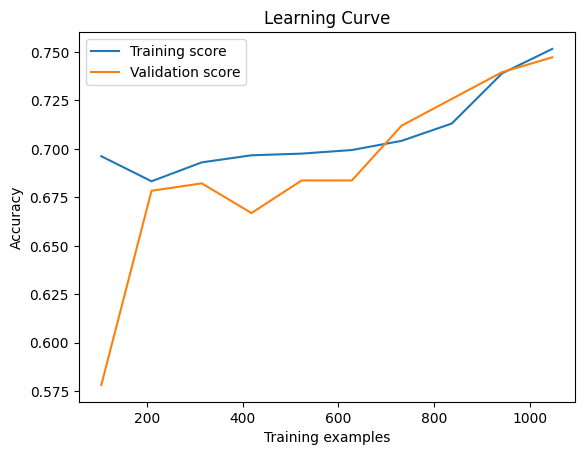

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

weights = model.coef_
bias = model.intercept_

# Print optimal weights and bias
print("Optimal Weights:", weights)
print("Bias:", bias)
# Make predictions on test data
y_pred = model.predict(X_test)



# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()